In [24]:
#!pip uninstall numpy


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import random

In [16]:
sales = pd.read_csv("/Users/amitpatel/Desktop/ML_Washington/Week_1/kc_house_data.csv")

In [17]:
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [18]:
train_data, test_data = train_test_split(sales, test_size = 0.2)

In [19]:
inp = np.array([1,2,3,5])
out = sum(val**2 for val in inp)
out

39

In [20]:
def simple_linear_regression(input_feature, output):
    # compute the sum of input_feature and output
    # compute the product of the output and the input_feature and its sum
    # compute the squared value of the input_feature and its sum
    # use the formula for the slope
    # use the formula for the intercept
    n = len(input_feature)
    sum_input = sum(input_feature)
    sum_output = sum(output)
    input_output_sum = sum(input_feature * output)
    sum_squared_input = sum(val**2 for val in input_feature)
    slope = ((input_output_sum) - ((sum_input * sum_output)/n))/((sum_squared_input) - ((sum_input * sum_input)/n))
    intercept = (sum_output/n) - (slope * (sum_input)/n)
    return(intercept, slope)
    


We can test that our function works by passing it something where we know the answer. 
In particular we can generate a feature and then put the output exactly on a line: 
    output = 1 + 1*input_feature then we know both our slope and intercept should be 1

In [21]:
random.sample(range(5),5)

[3, 0, 1, 2, 4]

In [22]:
test_feature = np.array(random.sample(range(5),5))
test_output = 1 + 1*test_feature
(test_intercept,test_slope) = simple_linear_regression(test_feature, test_output)
print ("Intercept: " + str(test_intercept))
print ("Slope: " + str(test_slope))

Intercept: 1.0
Slope: 1.0


In [23]:
sqft_intercept, sqft_slope = simple_linear_regression(train_data['sqft_living'],train_data['price'])
print ("Intercept: " + str(sqft_intercept))
print ("Slope: " + str(sqft_slope))

Intercept: -48076.76952418161
Slope: 282.91840674351363


In [24]:
def get_regression_predictions(input_feature, intercept, slope):
    # calculate the predicted values:
    predicted_values = slope * input_feature + intercept
    return predicted_values

In [25]:
my_house_sqft = 2650
estimated_price = get_regression_predictions(my_house_sqft, sqft_intercept, sqft_slope)
print ("The estimated price for a house with %d squarefeet is $%.2f" % (my_house_sqft, estimated_price))

The estimated price for a house with 2650 squarefeet is $701657.01


In [26]:
def get_residual_sum_of_squares(input_feature, output, intercept, slope):
    # First get the predictions
    # then compute the residuals (since we are squaring it doesn't matter which order you subtract)
    # square the residuals and add them up
    predicted_values = get_regression_predictions(input_feature, intercept, slope)
    residuals = output - predicted_values
    RSS = sum(value**2 for value in residuals)
    return(RSS)


In [27]:
print (get_residual_sum_of_squares(test_feature, test_output, test_intercept, test_slope)) # should be 0.0

0.0


In [28]:
rss_prices_on_sqft = get_residual_sum_of_squares(train_data['sqft_living'], train_data['price'], sqft_intercept, sqft_slope)
print ('The RSS of predicting Prices based on Square Feet is : ' + str(rss_prices_on_sqft))

The RSS of predicting Prices based on Square Feet is : 1177115388967507.8


In [29]:
def inverse_regression_predictions(output, intercept, slope):
    estimated_feature = (output - intercept)/slope
    return estimated_feature


In [30]:
my_house_price = 800000
estimated_squarefeet = inverse_regression_predictions(my_house_price, sqft_intercept, sqft_slope)
print ("The estimated squarefeet for a house worth $%.2f is %d" % (my_house_price, estimated_squarefeet))

The estimated squarefeet for a house worth $800000.00 is 2997


In [31]:
# Estimate the slope and intercept for predicting 'price' based on 'bedrooms'
bdr_intercept,bdr_slope = simple_linear_regression(train_data['bedrooms'], train_data['price'])
print(bdr_intercept,bdr_slope)

123980.6219484806 123151.48570637158


In [32]:
# Compute RSS when using bedrooms on TEST data:
print (get_residual_sum_of_squares(test_data['bedrooms'], test_data['price'], bdr_intercept, bdr_slope))

521910076559830.5


In [33]:
# Compute RSS when using squarefeet on TEST data:
print(get_residual_sum_of_squares(test_data['sqft_living'], test_data['price'], sqft_intercept, sqft_slope))

300258638548980.7


In [34]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [8]:
sales.shape

(21613, 21)

In [9]:
sales.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<function matplotlib.pyplot.show>

<Figure size 1080x720 with 0 Axes>

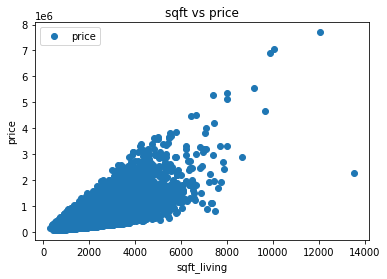

In [13]:
plt.figure(figsize=(15,10))
sales.plot(x='sqft_living', y='price', style = 'o')
plt.title('sqft vs price')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show

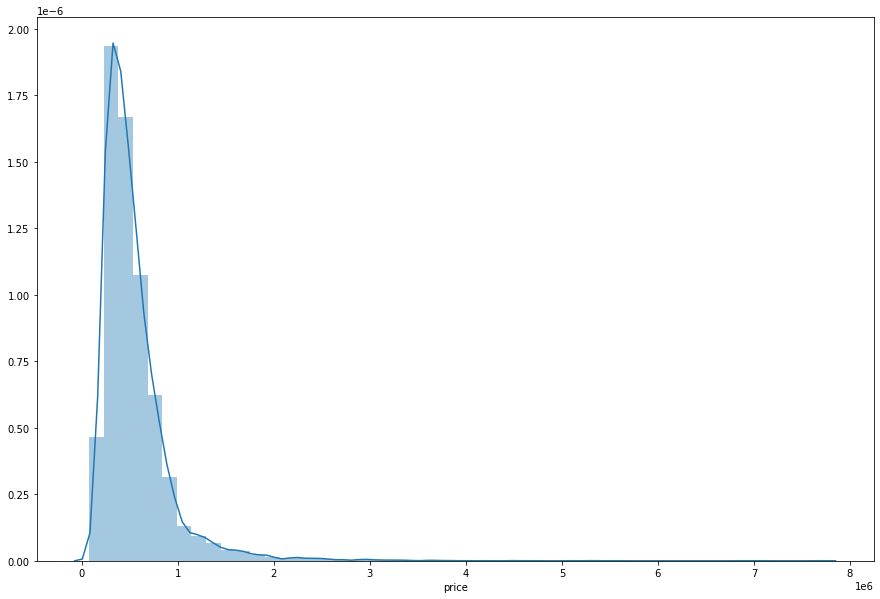

In [14]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(sales['price'])

In [35]:
train_data.shape

(17290, 21)

In [37]:
test_data.shape

(4323, 21)

In [45]:
521910076559830.5/4323

120728678362.20923

In [39]:
test_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
763,8856940060,20150227T000000,374950.0,4,2.75,2730,4683,2.0,0,0,...,7,2730,0,2005,0,98038,47.3608,-122.043,2230,4924
15154,2770604615,20141121T000000,735000.0,4,2.00,1640,6000,1.5,0,0,...,9,1640,0,1911,0,98119,47.6505,-122.375,1900,6000
2909,6713100031,20150211T000000,476000.0,3,2.25,1570,7187,1.0,0,0,...,8,1170,400,1980,0,98133,47.7604,-122.356,1660,8775
6349,446000020,20140913T000000,439500.0,4,1.00,1360,5500,1.5,0,0,...,7,1360,0,1950,0,98115,47.6878,-122.285,1530,5790
888,1387300070,20140825T000000,374000.0,3,1.50,1330,10640,1.0,0,0,...,7,1330,0,1976,0,98011,47.7364,-122.193,1460,8520


In [40]:
predicted_values = get_regression_predictions(test_data['sqft_living'],sqft_intercept, sqft_slope)

In [44]:
predicted_values.astype('int64')

763       724290
15154     415909
2909      396105
6349      336692
888       328204
          ...   
20128     379130
21600    1216568
2749      998721
19466     947796
15664     381959
Name: sqft_living, Length: 4323, dtype: int64

In [46]:
test_data['predicted_price_sqft'] = predicted_values

/Users/amitpatel/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
test_data.shape

(4323, 22)

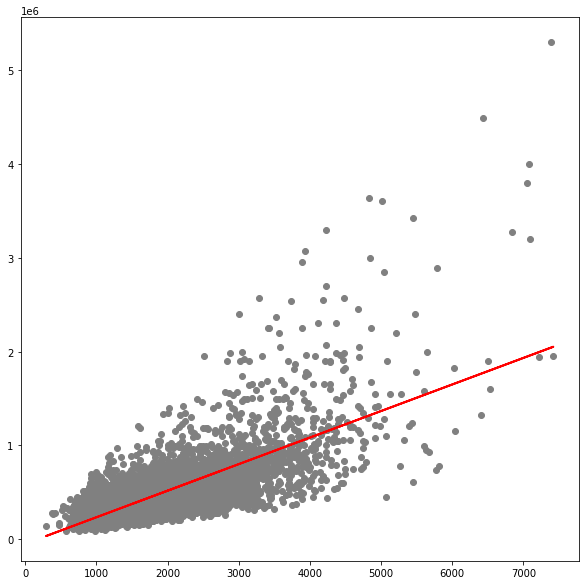

In [51]:
plt.figure(figsize=(10,10))
plt.scatter(test_data['sqft_living'], test_data['price'],  color='gray')
plt.plot(test_data['sqft_living'], test_data['predicted_price_sqft'], color='red', linewidth=2)
plt.show()

In [57]:
regressor = LinearRegression()
regressor.fit(train_data['sqft_living'].values.reshape(-1,1),train_data['price'].values.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
print(regressor.intercept_)
print(regressor.coef_)

[-48076.76952418]
[[282.91840674]]


In [61]:
predicted_price_sqft_2 = regressor.predict(test_data['sqft_living'].values.reshape(-1,1))

In [62]:
predicted_price_sqft_2

array([[724290.48088561],
       [415909.41753518],
       [396105.12906313],
       ...,
       [998721.33542682],
       [947796.02221299],
       [381959.20872596]])

In [63]:
test_data['predicted_price_sqft_2'] = predicted_price_sqft_2.flatten()

/Users/amitpatel/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [64]:
test_data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,predicted_price_sqft,predicted_price_sqft_2
763,8856940060,20150227T000000,374950.0,4,2.75,2730,4683,2.0,0,0,...,0,2005,0,98038,47.3608,-122.043,2230,4924,7.242905e+05,7.242905e+05
15154,2770604615,20141121T000000,735000.0,4,2.00,1640,6000,1.5,0,0,...,0,1911,0,98119,47.6505,-122.375,1900,6000,4.159094e+05,4.159094e+05
2909,6713100031,20150211T000000,476000.0,3,2.25,1570,7187,1.0,0,0,...,400,1980,0,98133,47.7604,-122.356,1660,8775,3.961051e+05,3.961051e+05
6349,446000020,20140913T000000,439500.0,4,1.00,1360,5500,1.5,0,0,...,0,1950,0,98115,47.6878,-122.285,1530,5790,3.366923e+05,3.366923e+05
888,1387300070,20140825T000000,374000.0,3,1.50,1330,10640,1.0,0,0,...,0,1976,0,98011,47.7364,-122.193,1460,8520,3.282047e+05,3.282047e+05
7905,2473350790,20150511T000000,371000.0,3,1.75,1970,9512,1.0,0,0,...,0,1968,0,98058,47.4545,-122.146,2250,10573,5.092725e+05,5.092725e+05
21170,6601200020,20150127T000000,235245.0,4,2.50,1954,5075,2.0,0,0,...,0,2007,0,98001,47.2606,-122.253,1934,5000,5.047458e+05,5.047458e+05
1786,2492200335,20150423T000000,901000.0,4,3.25,1560,4080,1.0,0,0,...,0,1916,0,98126,47.5347,-122.380,1370,4080,3.932759e+05,3.932759e+05
8884,8122100835,20140812T000000,183000.0,2,1.00,670,5140,1.0,0,0,...,0,1926,0,98126,47.5387,-122.371,850,5140,1.414786e+05,1.414786e+05
5063,7237550020,20140703T000000,1100000.0,4,3.75,5070,60123,2.0,0,0,...,0,2000,0,98053,47.6567,-122.004,4920,101930,1.386320e+06,1.386320e+06


In [66]:
print('RSS:', metrics.mean_squared_error(test_data['price'], test_data['predicted_price_sqft']))

RSS: 69456081089.28525


In [67]:
300258638548980.7/4323

69456081089.28539